In [1]:
import numpy as np
import pandas as pd
import sys
from pathlib import Path
sys.path.append('..') 
import platform
import os
from pathlib import Path
import shutil
from utils.basics.data_org import curr_computer, move_subfolders
from pathlib import Path
import shutil
from utils.basics.data_org import curr_computer
from utils.behavior.session_utils import clean_up_licks, load_df_from_mat
from scipy.io import loadmat
from itertools import chain
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
beh_df, licks_L, licks_R = load_df_from_mat(r'C:\Users\zhixi\Documents\data\754895\m754895d20250109\sorted\session\m754895d20250109_sessionData_behav')

In [10]:
def parse_session_string(file_or_folder):
    """
    Parses input string to generate corresponding pathData outputs.

    Args:
        file_or_folder (str): Session name or name of .asc file.
                              e.g., 'mBB041d20161006' or 'mBB041d20161006.asc'
        root (str): Root folder, e.g., 'G:\\'
        sep (str): Separator, e.g., '\\' or '/'

    Returns:
        dict: A dictionary containing session-related path data.
    """
    root = curr_computer()
    filename = file_or_folder
    # Split animal name and date
    animal_name, date = filename.split("d", 1)
    animal_name = animal_name[1:]  # Remove leading 'm'
    date = date[:9]
    session_folder = f"m{animal_name}d{date}"

    if ".asc" in file_or_folder:  # Input is an .asc file
        behavioral_data_path = os.path.join(root, animal_name, session_folder, "behavior", filename)
        suptitle_name = filename.split(".asc")[0]
        save_fig_name = suptitle_name
        videopath = os.path.join(root, animal_name, session_folder, "pupil")
        sorted_folder_location = lick_path = None
    else:  # Input is the folder
        file_path = os.path.join(root, animal_name, session_folder, "behavior")
        all_files = list(Path(file_path).iterdir())
        file_ind = [
            file.name for file in all_files if file_or_folder + ".asc" in file.name
        ]

        if file_ind:
            behavioral_data_path = os.path.join(file_path, file_ind[0])
            suptitle_name = file_ind[0][:-4]  # Remove '.asc'
        else:  # If looking at a folder without behavioral data
            suptitle_name = None
            behavioral_data_path = None

        save_fig_name = suptitle_name
        videopath = os.path.join(root, animal_name, session_folder, "pupil")

        if file_or_folder[-1].isalpha():  # If last character is alphabetical
            sorted_folder_location = os.path.join(
                root, animal_name, session_folder, "sorted", f"session {file_or_folder[-1]}"
            )
            lick_path = os.path.join(root, animal_name, session_folder, "lick", file_or_folder[-1])
        else:
            sorted_folder_location = os.path.join(root, animal_name, session_folder, "sorted", "session")
            lick_path = os.path.join(root, animal_name, session_folder, "lick", "session")

    # Construct output dictionary
    path_data = {
        "aniName": animal_name,
        "suptitleName": suptitle_name,
        "sessionFolder": session_folder,
        "sortedFolder": sorted_folder_location,
        "animalName": animal_name,
        "saveFigName": save_fig_name,
        "saveFigFolder": os.path.join(root, animal_name, session_folder, "figures"),
        "baseFolder": os.path.join(root, animal_name, session_folder),
        "behavioralDataPath": behavioral_data_path,
        "date": date,
        "videopath": videopath,
        "lickPath": lick_path,
    }

    # Check for neuralynx folders
    base_folder = path_data["baseFolder"]
    nlynx_folder = Path(base_folder, "neuralynx")
    if nlynx_folder.is_dir():
        path_data.update(
            {
                'nlynx_folder': os.path.join(base_folder, "neuralynx"),
                'nlynxFolderOpto': os.path.join(base_folder, "neuralynx", "opto"),
                'nlynxFolderSession': os.path.join(base_folder, "neuralynx", "session"),
            }
        )

    return path_data


In [11]:
path_data = parse_session_string('m754895d20250109')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\svc_aind_behavior\\Documents\\sueData\\754895\\m754895d20250109\\behavior'

In [3]:
def load_session_df(session):
    

,trialType,trialEnd,CSon,rewardL,rewardR,respondTime,rewardTime,rewardProbL,rewardProbR,laser
0,CSplus,204723.0,195382,1.0,NaN,195657.0,195858.0,90,10,0
1,CSplus,212124.0,204723,NaN,0.0,204903.0,205104.0,90,10,0
2,CSplus,218445.0,212124,1.0,NaN,212312.0,212513.0,90,10,0
3,CSplus,226338.0,218445,1.0,NaN,218900.0,219101.0,90,10,0
4,CSplus,232347.0,226338,NaN,NaN,NaN,NaN,90,10,0
5,CSplus,246477.0,232347,NaN,1.0,232443.0,232644.0,90,10,0
6,CSplus,258869.0,246477,NaN,0.0,246578.0,246779.0,90,10,0
7,CSplus,265287.0,258869,NaN,0.0,259007.0,259208.0,90,10,0
8,CSplus,269561.0,265287,NaN,0.0,265390.0,265591.0,90,10,0
9,CSplus,279196.0,269561,1.0,NaN,270039.0,270239.0,90,10,0


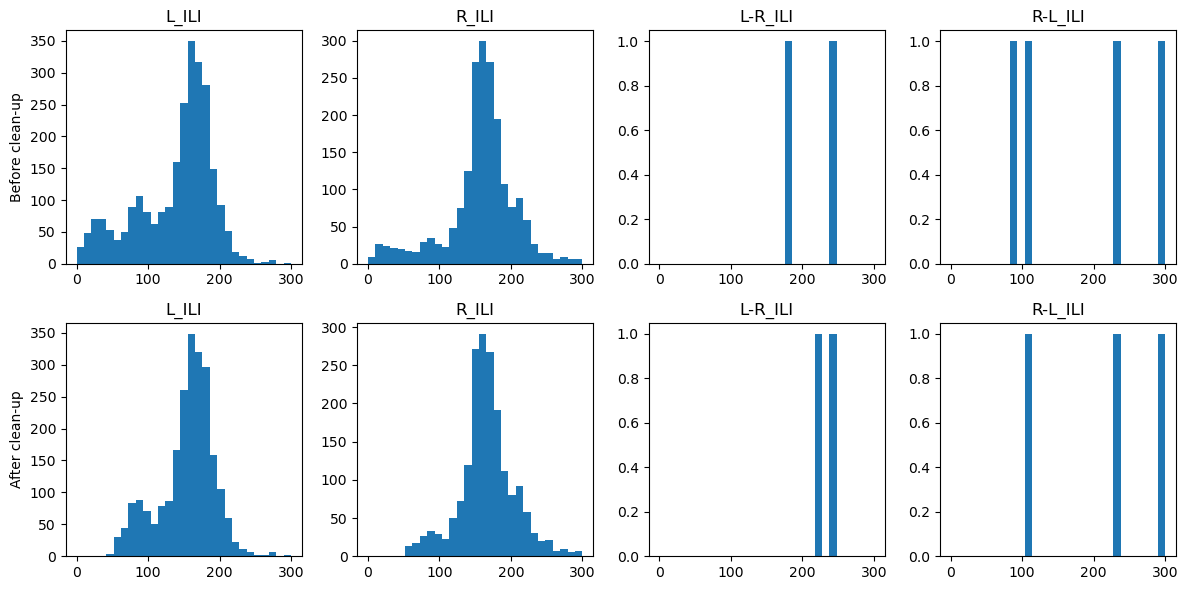

In [4]:
cleaned_licks_L, cleaned_licks_R, fig = clean_up_licks(licks_L, licks_R, plot=True)